<br><font size="8">MLFTW<br><br><strong>Análise de Sentimento em Áudio - Parte 1</strong></font>

por Peterson Katagiri Zilli (<peterson.zilli@gmail.com>) - 2017/09/23<br>

Esta é a Parte 1 da nossa abordagem de análise de sentimentos usando Aprendizado de máquina.

Aqui abordamos a extração de características (*features*, em inglês) de arquivos de áudio no formato wav.

O vídeo deste tutorial está disponível em **https://www.youtube.com/watch?v=49G-FE4Kpfo**. Há também um resumo, em: https://www.youtube.com/watch?v=9PuRGeUpnzc.

Pontos antes de começarmos:
* O objetivo do MLFTW é dividir e gerar conhecimento sobre Aprendizado de Máquina e assuntos afins.
* O Cientista desenvolve [3 áreas de conhecimento](https://www.oreilly.com/ideas/beyond-the-venn-diagram): Matemática/Estatistica, Hacking Skills/Programação e Conhecimento do Domínio do Problema.


# Ferramentas

<img src="assets/jupyter.jpg" alt="Jupyter Logo" style="height: 100px; display: inline; margin: 0 5px;"/>
<img src="assets/pythonlogo.png" alt="Python Logo" style="height: 100px; display: inline; margin: 0 5px;"/>
<img src="assets/librosa.png" alt="librosa Logo" style="height: 100px; display: inline; margin: 0 25px;"/>
<img src="assets/numpy.jpg" alt="Numpy Logo" style="height: 120px; display: inline; margin: 0 5px;"/>
<img src="assets/matplotlib.svg" alt="Matplotlib Logo" style="height: 100px; display: inline; margin: 0 5px;"/>
<img src="assets/ipython.png" alt="Ipython Logo" style="height: 100px; display: inline; margin: 0 5px;"/>


* **jupyter**: é esta aplicação web que permite criar e compartilhar documentos que contém código executável em python e outras linguagens.
* **python**: nossa linguagem de programação que cola tudo.
* **librosa**: é um pacote Python de processamento de áudio.
* **numpy**: é um pacote do Python que adiciona suporte a matrizes multidimensionais e vetores e também uma série de funções de alto nível que operam sobre estes objetos.
* **matplotlib**: é uma biblioteca para plotar gráficos
* **IPython.display.Audio**: é uma biblioteca que deixa você rodar áudio diretamente de um Notebook.

### Você pode executar todo este tutorial a partir de servidores na Azure!

Para isso:
* Crie uma conta no [Azure Notebooks](https://notebooks.azure.com) (se você já tem uma conta da Microsoft é só logar com ela!)
* Entre na minha Library pública [https://notebooks.azure.com/**petersonzilli/libraries/mlftw**](https://notebooks.azure.com/petersonzilli/libraries/mlftw)
* Clone a Library para o seu espaço na Azure. Assim você terá o notebook *MLFTW_Extracao_de_features_de_audio.ipynb* na Sua Library

Criar e Executar Notebooks na Azure Notebooks **É gratuíto!**


# Introdução

## *Aprendizagem de máquina*, *análise de sentimento* e os *problemas de classificação*

O Objetivo de um modelo de análise de sentimento de áudio é apontar o sentimento correto dado um exemplo de áudio.


![Fase de Inferência](assets/ML_Inferencia.png)


Uma das formas de fazer um modelo de análise de sentimento é usar aprendizado de máquina, e no caso que trouxemos aqui

![Fase de Treinamento](assets/ML_Treinamento.png)

Na linguagem de praticantes do aprendizado de máquina, tratamos aqui de um problema de classificação com aprendizado supervisionado.

* **Problema de Classificação** [veja mais aqui](https://en.wikipedia.org/wiki/Machine_learning#Types_of_problems_and_tasks): significa que vamos classificar cada entrada em uma das classes/sentimentos abordados. Dada uma entrada, a saída do modelo é a classe a que ela pertence!

* **Aprendizado Supervisionado** [veja mais aqui](https://en.wikipedia.org/wiki/Supervised_learning): significa que nosso modelo classificador será treinado com pares de (entrada, classe) na qual a classe da entrada é informada. Estamos ensinando nosso modelo com exemplos!



Dividimos nossa abordagem em duas partes:

1. *Dados de treinamento* e  *Extrator de features* - a partir de gravações de áudio digitais extraímos uma séries de *descritores* do áudio.

2. *Modelo de classificação* que enquadra os *descritores* do áudio em uma das classificações de sentimento, com métrica de qualidade e algoritmo de minimização do custo.

Nesta primeira parte o foco é a extração de features da base de treinamento
![Escopo da Parte 1](assets/ML_Parte1a.png)
![Escopo da Parte 1](assets/ML_Parte1.png)

## Nossa Agenda

1. Sinal de áudio analógico *vs* digital
2. Sinal no digital no domínio do Tempo *vs* domínio da Frequência
3. Sinal no domínio da Frequência: escala de Frequências *vs* escala log-mel
4. Extraindo log-mels de um conjunto de arquivo
5. Desafio!

## 1. Sinal Analógico *vs* Digital

### Como é o áudio analógico

É um sinal contínuo que representa uma onda de som. A figura que segue é um desenho um sinal analógico.

![Sinal Analógico](assets/sinal_analogico.png)


Duas dimensões da figura:

* **Tempo**: é a medida do tempo tempo, oras.

* **Amplitude**: é a medida de mudança de um sinal durante um período.
![Sinal Analógico](https://upload.wikimedia.org/wikipedia/commons/8/8a/Sine_voltage.svg)
Olha na curva:
1. Amplitude de pico
2. Amplitude pico à pico
3. Amplitude RMS
4. Período da onda (ok... não é uma amplitude. Mas o desenho que eu consegui na [wikipedia](https://en.wikipedia.org/wiki/Amplitude) tinha este número 4 aqui...)

### Como é o áudio digital PCM

Um PCM é uma representação do sinal analógico que amostra regularmente da amplitude do sinal analógico quantizado em intervalos uniformes de tempo.

* **Profundidade em bits**: número de níveis diferentes em que uma amostra pode ser quantizada.
<p style="align:'center'"><img src="http://digitalsoundandmusic.schwartzsound.com/wp-content/uploads/2014/05/Figure-5.14-Wave-quantized-at-different-bit-depths.png" alt="Profundidade em Bits" style="width: 600px; align:center"/></p>

* **Taxa de amostragem**: é o número de amostras por intervalo de tempo geralmente medida em amostras por segundo.
![Taxa de amostragem](http://artsites.ucsc.edu/ems/music/tech_background/TE-16/teces_164.gif)

Ou seja, quanto maior a profundidade em bits e maior a taxa de amostragem, mais próximo do sinal analógico.
![Combinação entre amostragem e profundidade](https://www.prosoundtraining.com/site/wp-content/uploads/2010/01/Vol36_Sep08_ThinkingDigitally-graph1.png)

#### Criando sinais de áudio digital

In [57]:
import numpy # cálculos nos vetores e matrizes!
import IPython.display as ipd # ouvir o audio produzido a partir do notebook

In [59]:
numpy.linspace(0, T, int(T*sample_rate), endpoint=False) # time variable

array([  0.00000000e+00,   1.25000000e-04,   2.50000000e-04, ...,
         4.99962500e+00,   4.99975000e+00,   4.99987500e+00])

In [60]:
sample_rate = 8000 # amostras por segundo
T = 5.0 # segundos
t = numpy.linspace(0, T, int(T*sample_rate), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t) #uma onda senoidal pura de 440 Hz (ISO 16!)

In [61]:
ipd.Audio(x, rate=sample_rate) # Carrega a onda de 440Hz

In [62]:
y = 0.5*numpy.sin(2*numpy.pi*1000*t) #uma onda senoidal pura de 1000 Hz

In [63]:
ipd.Audio(y, rate=sample_rate) # Carrega a onda de 1000Hz

In [64]:
xy = x + y
ipd.Audio(xy, rate=sample_rate) # carrega o som de x + y

## 2. Sinais no domínio do Tempo *vs* domínio da Frequência

### Sinais no domínio do tempo

Quando reproduzimos os sons digitais, transformamos os sinais em ondas mecânicas, que na verdade representam as variações da amplitude no tempo.

Desenhamos as variações das amplitudes no tempo dos sinais x, y e xy, seguindo 1/8000 amostras por segundo

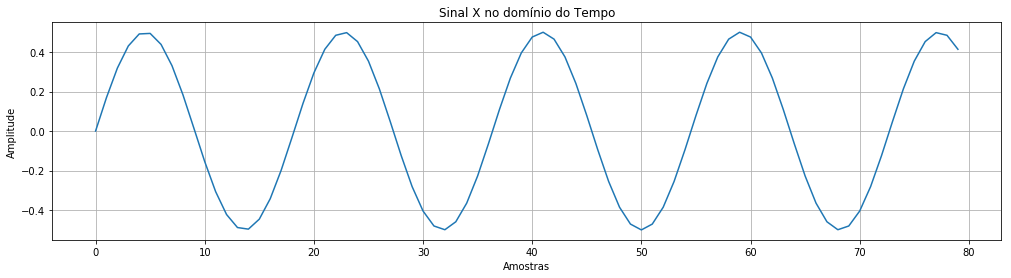

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(17, 4))
plt.plot(x[:int(0.01*8000)])
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Sinal X no domínio do Tempo')
plt.grid(True)
plt.show()

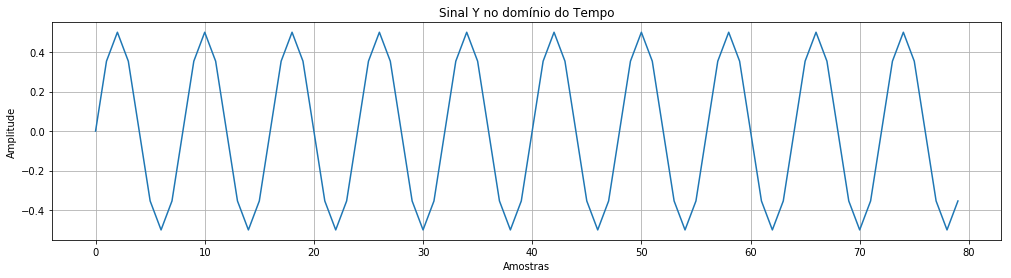

In [66]:
plt.figure(figsize=(17, 4))
plt.plot(y[:int(0.01*8000)])
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Sinal Y no domínio do Tempo')
plt.grid(True)
plt.show()

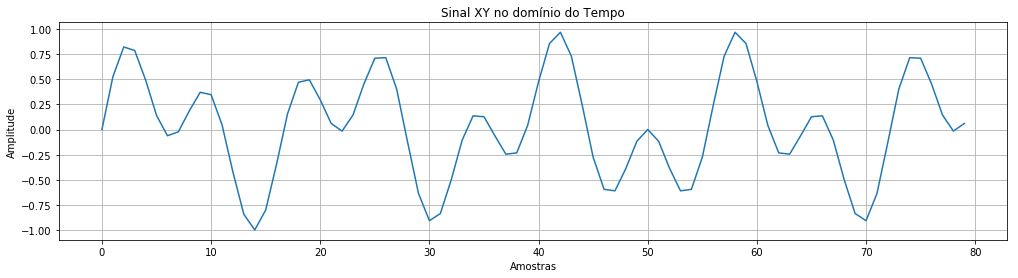

In [67]:
plt.figure(figsize=(17, 4))
plt.plot(xy[:int(0.01*8000)])
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Sinal XY no domínio do Tempo')
plt.grid(True)
plt.show()

In [1]:
!conda install -c conda-forge -y librosa

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /home/nbcommon/anaconda3_431:

The following NEW packages will be INSTALLED:

    audioread: 2.1.4-py36_2      conda-forge
    joblib:    0.11-py36_0       conda-forge
    librosa:   0.5.1-py36_1      conda-forge
    resampy:   0.1.5-np111py36_1 conda-forge

The following packages will be SUPERSEDED by a higher-priority channel:

    conda:     4.3.25-py36_0                 --> 4.3.23-py36_0 conda-forge
    conda-env: 2.6.0-0                       --> 2.6.0-0       conda-forge

The following packages will be DOWNGRADED:

    ffmpeg:    3.2.4-1           conda-forge --> 2.8.6-5       conda-forge

conda-env-2.6. 100% |################################| Time: 0:00:00   1.21 MB/s
ffmpeg-2.8.6-5 100% |################################| Time: 0:00:01  32.70 MB/s
audioread-2.1. 100% |################################| Time: 0:00:00  25.16 MB/s
joblib-0.11-py 100% |###############

8000


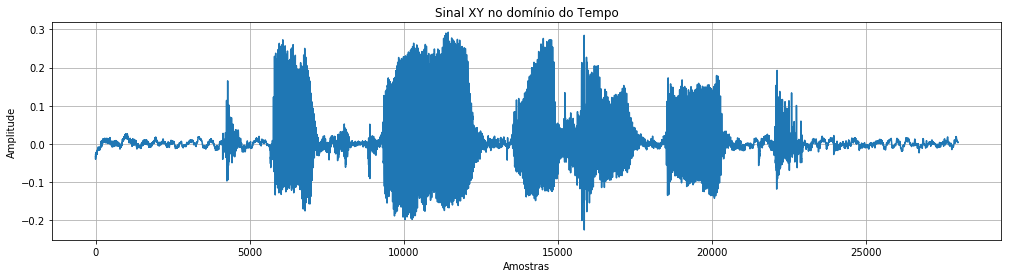

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa

sinal_audio, sample_rate_sinal_audio = librosa.load('raw_audio_openspeech_american/OSR_us_000_0010_8k.wav', sr=None)
print(sample_rate_sinal_audio)
plt.figure(figsize=(17, 4))
plt.plot(sinal_audio[:int(3.5*sample_rate_sinal_audio)]) # 3.5 segundos do áudio
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Sinal XY no domínio do Tempo')
plt.grid(True)
plt.show()

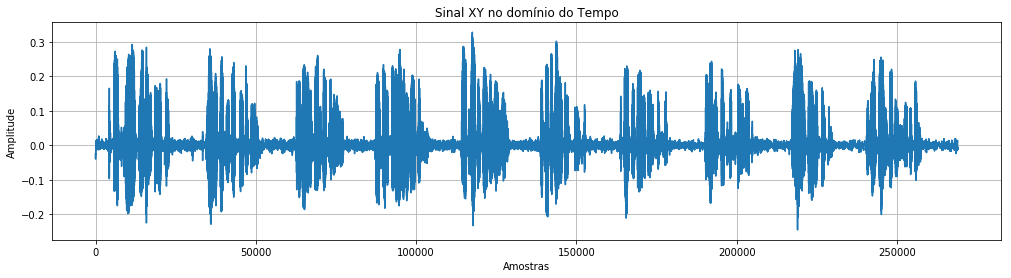

In [69]:
plt.figure(figsize=(17, 4))
plt.plot(sinal_audio)
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Sinal XY no domínio do Tempo')
plt.grid(True)
plt.show()

In [71]:
ipd.Audio(sinal_audio, rate=sample_rate_sinal_audio) # carrega o som do openspeech

### Sinais no domínio da Frequência

Usamos a Transformada de Fourier de Curto termo (ou *Short Time Fourier Transform* ou STFT, mais info [aqui](https://pt.wikipedia.org/wiki/Transformada_de_Fourier_de_curto_termo)) para transformar

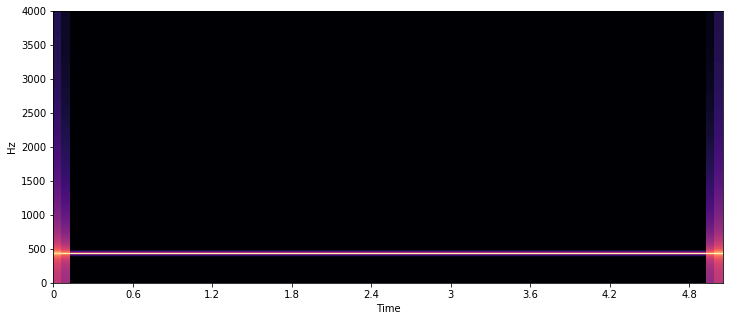

In [21]:
import librosa.display

plt.figure(figsize=(12, 5))

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(X) # 20 * log10(sinal)
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')

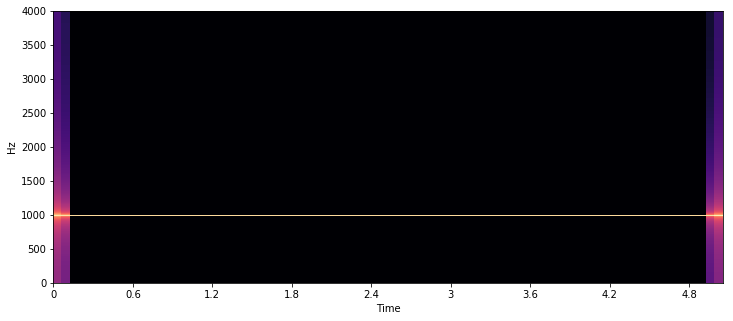

In [22]:
plt.figure(figsize=(12, 5))

Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(Y) # 20 * log10(sinal)
librosa.display.specshow(Ydb, sr=sample_rate, x_axis='time', y_axis='hz')

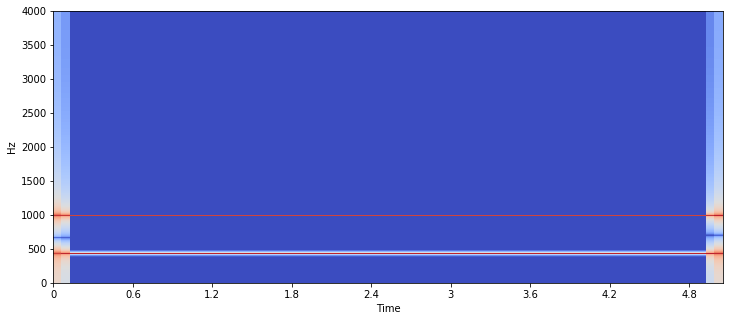

In [23]:
plt.figure(figsize=(12, 5))

XY = librosa.stft(xy)
XYdb = librosa.amplitude_to_db(XY) # 20 * log10(sinal)
librosa.display.specshow(XYdb, sr=sample_rate, x_axis='time', y_axis='hz')

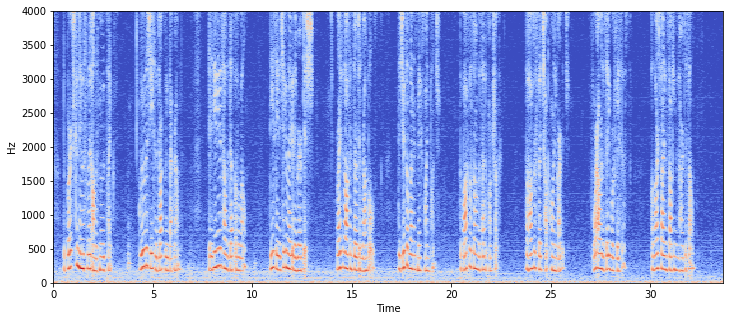

In [24]:
plt.figure(figsize=(12, 5))

SINAL_AUDIO = librosa.stft(sinal_audio)
SINAL_AUDIOdb = librosa.amplitude_to_db(SINAL_AUDIO) # 20 * log10(sinal)
librosa.display.specshow(SINAL_AUDIOdb, sr=sample_rate_sinal_audio, x_axis='time', y_axis='hz')

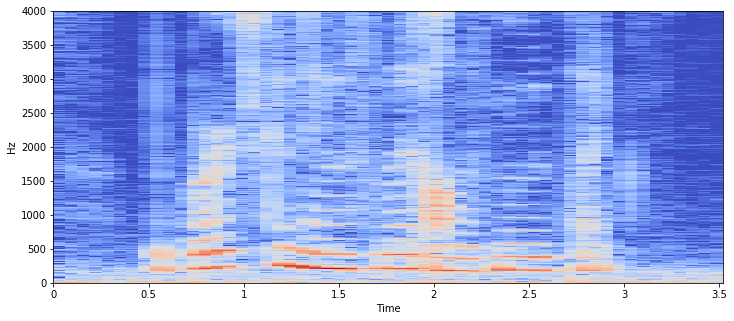

In [25]:
plt.figure(figsize=(12, 5))

SINAL_AUDIO = librosa.stft(sinal_audio[0:int(3.5 * sample_rate)])
SINAL_AUDIOdb = librosa.amplitude_to_db(SINAL_AUDIO) # 20 * log10(sinal)
librosa.display.specshow(SINAL_AUDIOdb, sr=sample_rate_sinal_audio, x_axis='time', y_axis='hz')

### Como a stft funciona?

Você encontra uma descrição mais detalhada [aqui](https://pt.wikipedia.org/wiki/Transformada_de_Fourier_de_curto_termo)

Entretanto, para o propósito deste tutorial, basta sabermos que o método:
1. 'Fatia' o sinal no domínio do tempo - em pequenas fatias de 25ms, por exemplo.
2. Aplica uma variação da Transformada de Fourier para cada fatia do sinal no tempo.

Esta transformada mapeia uma função real unidimensional no tempo $f(t)$ numa função complexa bi-dimensional $F(\Omega,\tau)$, na qual geralmente a grandeza correspondente às variáveis $t$ e $\tau$ é o tempo, e a grandeza correspondente à variável $\Omega$ é a chamada frequência angular.

## 3. Sinais no domínio da Frequência *vs* log-Mels

O ouvido humano não distingue as frequencias com a mesma precisão e não ouve todas as frequências com a mesma intensidade.

A cóclea é o orgão responsável pela 

![Cóclea](http://oto2.wustl.edu/cochlea/images/pin350l.gif)

A Percepção é assim:
<img src="https://blog.medel.com/wp-content/uploads/2015/07/CCC-Piano-Graphics-2011-EN.jpg" alt="Percepção da Coclea comparada com o Piano" style="width: 400px;"/>


Assim, várias escalas baseadas na percepção surgiram no passado, a fim de simular este efeito natural que existe no humano. uma delas é a [escala Mel](https://en.wikipedia.org/wiki/Mel_scale)

Ela segue este mapa entre as frequências naturais do som e as percebidas pelo ouvido humano:
<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Mel-Hz_plot.svg" alt="Mels vs Hertz" style="width: 800px;"/>




Para converter entre Hertz ($f$) e Mel ($m$) nós usamos as seguintes equações:

$$m = 2595 \log_{10} (1 + \frac{f}{700})$$

$$f = 700 (10^{m/2595} - 1) $$

## Gerando as features de um audio

## O nosso conjunto de dados

Salvamos na pasta data/raw_audio_openspeech/ o conjunto dos 25 arquivos de dados do Open Speech para inglês americano.

As sentenças foram gravadas a partir dos roteiros das [Harvard Sentences](http://www.cs.columbia.edu/~hgs/audio/harvard.htm)

Os áudios estão todos no formato 16b PCM ([O que é PCM?](https://en.wikipedia.org/wiki/Pulse-code_modulation)) e foram gravados em 8kHz, conforme descrito [aqui](http://www.voiptroubleshooter.com/open_speech/american.html)

Segue um mapa entre o nome do arquivo e o gênero da pessoa que gravou:

<table><tbody><tr><th>Arquivo</th><th>Classe</th></tr><tr><td>OSR_us_000_0010_8k.wav</td><td>F</td></tr><tr><td>OSR_us_000_0011_8k.wav</td><td>F</td></tr><tr><td>OSR_us_000_0012_8k.wav</td><td>F</td></tr><tr><td>OSR_us_000_0013_8k.wav</td><td>F</td></tr><tr><td>OSR_us_000_0014_8k.wav</td><td>F</td></tr><tr><td>OSR_us_000_0015_8k.wav</td><td>F</td></tr><tr><td>OSR_us_000_0016_8k.wav</td><td>F</td></tr><tr><td>OSR_us_000_0017_8k.wav</td><td>F</td></tr><tr><td>OSR_us_000_0018_8k.wav</td><td>F</td></tr><tr><td>OSR_us_000_0019_8k.wav</td><td>F</td></tr><tr><td>OSR_us_000_0030_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0031_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0032_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0034_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0035_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0036_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0037_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0038_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0039_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0040_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0057_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0058_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0059_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0060_8k.wav</td><td>M</td></tr><tr><td>OSR_us_000_0061_8k.wav</td><td>M</td></tr></tbody></table>

In [72]:
!ls raw_audio_openspeech_american

OSR_us_000_0010_8k.wav	OSR_us_000_0034_8k.wav
OSR_us_000_0011_8k.wav	OSR_us_000_0035_8k.wav
OSR_us_000_0012_8k.wav	OSR_us_000_0036_8k.wav
OSR_us_000_0013_8k.wav	OSR_us_000_0037_8k.wav
OSR_us_000_0014_8k.wav	OSR_us_000_0038_8k.wav
OSR_us_000_0015_8k.wav	OSR_us_000_0039_8k.wav
OSR_us_000_0016_8k.wav	OSR_us_000_0040_8k.wav
OSR_us_000_0017_8k.wav	OSR_us_000_0057_8k.wav
OSR_us_000_0018_8k.wav	OSR_us_000_0059_8k.wav
OSR_us_000_0019_8k.wav	OSR_us_000_0060_8k.wav
OSR_us_000_0030_8k.wav	OSR_us_000_0061_8k.wav
OSR_us_000_0031_8k.wav	OpenSpeech.txt
OSR_us_000_0032_8k.wav	raw_audio_openspeech-OpenSpeech.txt


## A. Ler o arquivo

In [73]:
import numpy as np
import scipy.io.wavfile

sample_rate, signal = scipy.io.wavfile.read(r'raw_audio_openspeech_american/OSR_us_000_0010_8k.wav')
signal = signal[0:int(3.5 * sample_rate)]  # Apenas os primeiros 3.5 segundos

In [74]:
sample_rate

8000

In [75]:
signal[500:510]

array([-12,  52, 169,  72,  14, -33, 100,  94, 141,  23], dtype=int16)

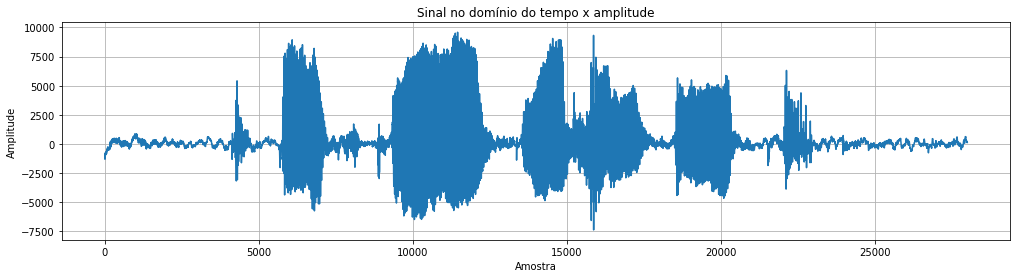

In [77]:
plt.figure(figsize=(17, 4))
plt.plot(signal)
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.title('Sinal no domínio do tempo x amplitude')
plt.grid(True)
plt.show()

## B. Aplicar Pré-Enfase

Vamos transformar o sinal para amplificar as frequências mais altas. A idéia é balanceramos as magnitudes do espectro das frequências (altas frequencias geralmente tem menor amplitude)

A transformação é $$y[t] = x[t] - \alpha x[t-1]$$

usamos $\alpha = 0.95$

In [78]:
pre_emphasis = 0.95
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

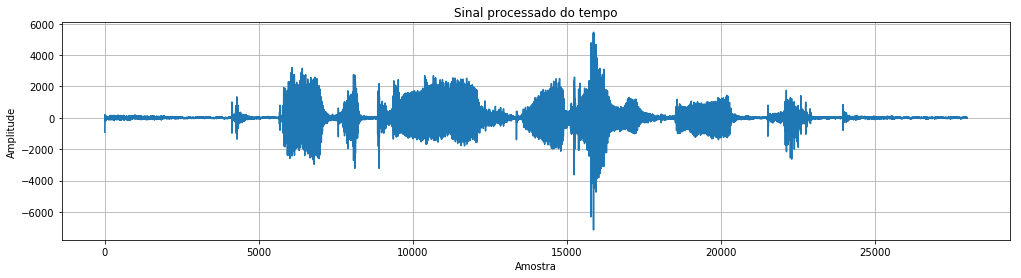

In [79]:
plt.figure(figsize=(17, 4))
plt.plot(emphasized_signal)
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.title('Sinal processado do tempo')
plt.grid(True)
plt.show()

# C. Fatiando o áudio em Frames

Nós seguimos o tamanho do frame de 25ms - $frame\_size = 0.025$ - e stride de 10ms - $frame\_stride = 0.010$. Ou seja, são 15 ms de overlap.

Tamanhos de Frames típicos no processamento de áudio vão de 20 ms a 40 ms com 40% à 60% de overlap entre frames consecutivos. 

In [80]:
frame_size = 0.025
frame_stride = 0.01

- Calculando o número de frames

In [81]:
signal_length = len(emphasized_signal)

frame_length, frame_step = int(round(frame_size * sample_rate)), int(round(frame_stride * sample_rate))
                                                                    
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # sempre temos pelo menos 1 frame

In [82]:
frame_length, frame_step, num_frames

(200, 80, 348)

- Preenchendo o sinal com Zeros para completar o último frame 

In [83]:
pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(emphasized_signal, z) # Pad do sinal com zeros

In [84]:
z, len(z)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 40)

- criando os frames a partir do sinal

In [86]:
np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T

array([[    0,     1,     2, ...,   197,   198,   199],
       [   80,    81,    82, ...,   277,   278,   279],
       [  160,   161,   162, ...,   357,   358,   359],
       ..., 
       [27600, 27601, 27602, ..., 27797, 27798, 27799],
       [27680, 27681, 27682, ..., 27877, 27878, 27879],
       [27760, 27761, 27762, ..., 27957, 27958, 27959]])

In [85]:
indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]

In [37]:
frames.shape

(348, 200)

# D. Aplicando uma janela de Hamming a cada frame

A ideia aqui é dar ênfase à informação contida próxima ao centro de cada frame. Por isso vamos aplicar uma janela de Hamming sobre cada um dos frames.

A janela é calculada com a equação:

$$w[n] = 0.54 − 0.46 cos ( \frac{2πn}{N − 1} )$$
onde $0 \leq n \leq N - 1$, $N$ é o tamanho da janela

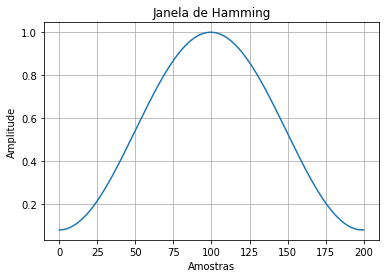

In [87]:
N = 200
n = np.arange(0.0, N, 0.01)

s = 0.54 - 0.46*np.cos(2*np.pi*n/(N-1))

plt.figure(figsize=(6, 4))
plt.plot(n, s)

plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Janela de Hamming')
plt.grid(True)
plt.show()

In [88]:
for frame in range(len(frames)):
    for sample in range(len(frames[frame])):
        frames[frame][sample] *= 0.54 - 0.46 * np.cos((2 * np.pi * sample) / (frame_length - 1)) 

## E. Calculando o Periodograma usando FFT

Vamos aplicar uma FFT de $N$-pontos em cada frame para calcular o espectro de frequências - Short-Time Fourier Transform (STFT), onde $N$ é tipicamente 256 ou 512.

Usamos $NFFT = 512$ e calculamos o periodograma usando a equação:

$$P = \frac{|FFT(x_i)|^2}{N}$$

onde $x_i$ é o $i$-ésimo frame no sinal $x$. Isto pode ser implementado com as linhas a seguir (usamos a função [rfft](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) do numpy):

In [89]:
NFFT = 512

mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude da FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power spectrum

In [90]:
print(mag_frames.shape, pow_frames.shape)

(348, 257) (348, 257)


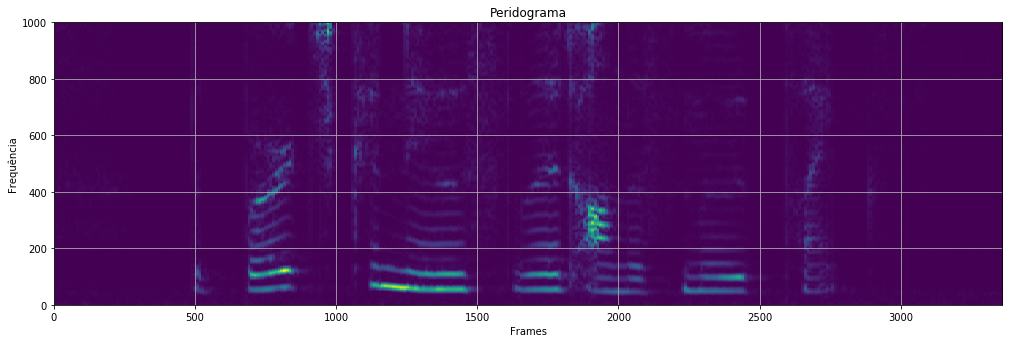

In [91]:
plt.figure(figsize=(17, 6))
plt.imshow(mag_frames.transpose(), extent=[0,3360,0,1000], origin='lower')
plt.xlabel('Frames')
plt.ylabel('Frequência')
plt.title('Peridograma')
plt.grid(True)
plt.show()

## F. Computar Bancos de Filtros da Escala de Mel

O último passo para computar os bancos de filtros é aplicar filtros triangulares ao espectro de potência para extrair as bandas de frequência. Tipicamente aplicam-se 40 filtros, $nfilt = 40$, na escala Mel.

O objetivo da escala Mel é aproximar a percepção humana não linear do som - nós diferenciamos melhor sons a baixas frequencias e menos os sons a altas frequencias.

Para converter entre Hertz ($f$) e Mel ($m$) nós usamos as seguintes equações:

$$m = 2595 \log_{10} (1 + \frac{f}{700})$$

$$f = 700 (10^{m/2595} - 1) $$

![Filtros de Mel](http://haythamfayek.com/assets/posts/post1/mel_filters.jpg) fonte: http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

In [93]:
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Converte Hz para Escala Mel - SAMPLE RATE dividido por 2!

print (low_freq_mel, high_freq_mel)

mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Igualmente espaçados na escala Mel
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = np.floor((NFFT + 1) * hz_points / sample_rate)

fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # Ponto da Esquerda
    f_m = int(bin[m])             # centro
    f_m_plus = int(bin[m + 1])    # ponto da direita

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

filter_banks = np.dot(pow_frames, fbank.T)
filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Estabilidade numérica
filter_banks = 20 * np.log10(filter_banks)  # dB

0 2146.06452751


In [94]:
filter_banks.shape

(348, 40)

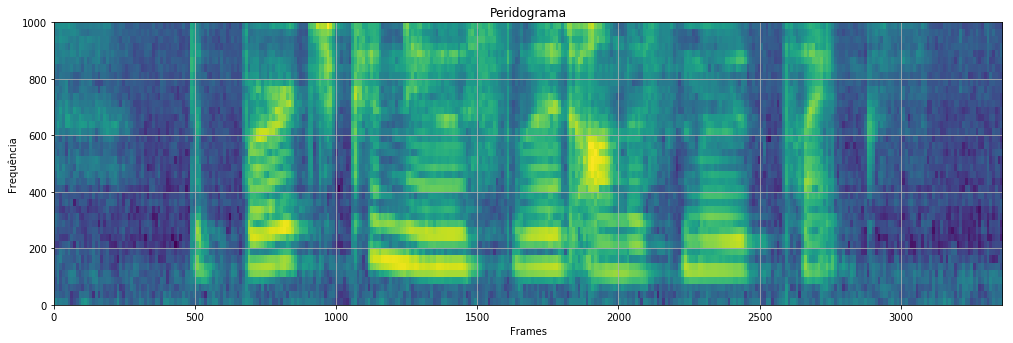

In [95]:
plt.figure(figsize=(17, 6))
plt.imshow(filter_banks.transpose(), extent=[0,3360,0,40*25], origin='lower')
plt.xlabel('Frames')
plt.ylabel('Frequência')
plt.title('Peridograma')
plt.grid(True)
plt.show()

## G. Normalizar os bancos de filtros

Nós normalizamos a informação nos bancos de filtros - subtraindo a média de cada coeficiente a partir de todos os frames - a fim de balancear o espectro de frequências e melhorar a razão Sinal/Ruído Signal-to-Noise (SNR).

In [96]:
filter_banks -= (numpy.mean(filter_banks, axis=0) + 1e-8)

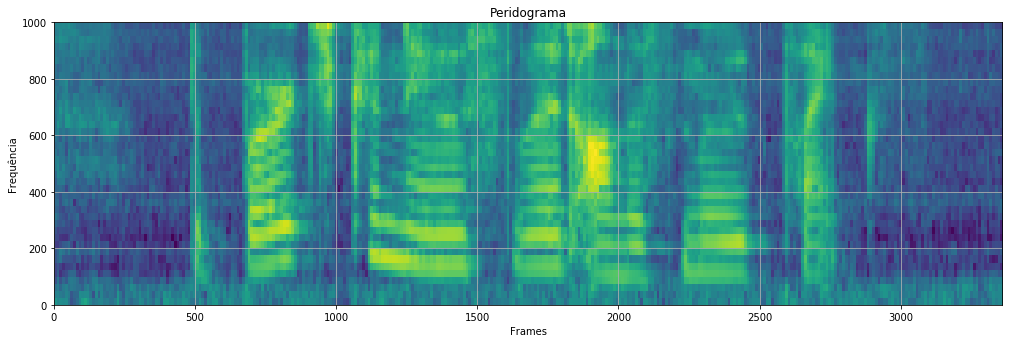

In [97]:
plt.figure(figsize=(17, 6))
plt.imshow(filter_banks.transpose(), extent=[0,3360,0,40*25], origin='lower')
plt.xlabel('Frames')
plt.ylabel('Frequência')
plt.title('Peridograma')
plt.grid(True)
plt.show()

In [98]:
filter_banks.shape

(348, 40)

In [99]:
filter_banks[0][:10]

array([ 12.4239113 ,  -0.53233674,  -9.1567388 , -26.27747607,
       -32.21907563, -31.60697759, -23.47404553, -23.41183288,
       -35.33004418, -30.15445922])

# Processando todo o Dataset

In [100]:
!ls raw_audio_openspeech_american

OSR_us_000_0010_8k.wav	OSR_us_000_0034_8k.wav
OSR_us_000_0011_8k.wav	OSR_us_000_0035_8k.wav
OSR_us_000_0012_8k.wav	OSR_us_000_0036_8k.wav
OSR_us_000_0013_8k.wav	OSR_us_000_0037_8k.wav
OSR_us_000_0014_8k.wav	OSR_us_000_0038_8k.wav
OSR_us_000_0015_8k.wav	OSR_us_000_0039_8k.wav
OSR_us_000_0016_8k.wav	OSR_us_000_0040_8k.wav
OSR_us_000_0017_8k.wav	OSR_us_000_0057_8k.wav
OSR_us_000_0018_8k.wav	OSR_us_000_0059_8k.wav
OSR_us_000_0019_8k.wav	OSR_us_000_0060_8k.wav
OSR_us_000_0030_8k.wav	OSR_us_000_0061_8k.wav
OSR_us_000_0031_8k.wav	OpenSpeech.txt
OSR_us_000_0032_8k.wav	raw_audio_openspeech-OpenSpeech.txt


In [102]:
!ls raw_audio_openspeech_american

OSR_us_000_0010_8k.wav	OSR_us_000_0034_8k.wav
OSR_us_000_0011_8k.wav	OSR_us_000_0035_8k.wav
OSR_us_000_0012_8k.wav	OSR_us_000_0036_8k.wav
OSR_us_000_0013_8k.wav	OSR_us_000_0037_8k.wav
OSR_us_000_0014_8k.wav	OSR_us_000_0038_8k.wav
OSR_us_000_0015_8k.wav	OSR_us_000_0039_8k.wav
OSR_us_000_0016_8k.wav	OSR_us_000_0040_8k.wav
OSR_us_000_0017_8k.wav	OSR_us_000_0057_8k.wav
OSR_us_000_0018_8k.wav	OSR_us_000_0059_8k.wav
OSR_us_000_0019_8k.wav	OSR_us_000_0060_8k.wav
OSR_us_000_0030_8k.wav	OSR_us_000_0061_8k.wav
OSR_us_000_0031_8k.wav	OpenSpeech.txt
OSR_us_000_0032_8k.wav	raw_audio_openspeech-OpenSpeech.txt


In [109]:
!ls

MLFTW_Extracao_de_features_de_audio.ipynb  proc_audio_openspeech_american
assets					   raw_audio_openspeech_american
desafio


In [111]:
!ls raw_audio_openspeech_american

OSR_us_000_0010_8k.wav	OSR_us_000_0034_8k.wav
OSR_us_000_0011_8k.wav	OSR_us_000_0035_8k.wav
OSR_us_000_0012_8k.wav	OSR_us_000_0036_8k.wav
OSR_us_000_0013_8k.wav	OSR_us_000_0037_8k.wav
OSR_us_000_0014_8k.wav	OSR_us_000_0038_8k.wav
OSR_us_000_0015_8k.wav	OSR_us_000_0039_8k.wav
OSR_us_000_0016_8k.wav	OSR_us_000_0040_8k.wav
OSR_us_000_0017_8k.wav	OSR_us_000_0057_8k.wav
OSR_us_000_0018_8k.wav	OSR_us_000_0059_8k.wav
OSR_us_000_0019_8k.wav	OSR_us_000_0060_8k.wav
OSR_us_000_0030_8k.wav	OSR_us_000_0061_8k.wav
OSR_us_000_0031_8k.wav	OpenSpeech.txt
OSR_us_000_0032_8k.wav	raw_audio_openspeech-OpenSpeech.txt


In [112]:
import os

pre_emphasis = 0.95
frame_size = 0.025
frame_stride = 0.01
NFFT = 512
nfilt = 40
printevery = 1

def preprocess_dataset(in_path='raw_audio_openspeech_american', out_path='proc_audio_openspeech_american'):
    # Cria uma pasta para os dados não processados
    if not os.path.exists(out_path):
        os.mkdir(out_path, 755);

    files = [x for x in os.listdir(in_path) if x.endswith('.wav')]
    #print(files)
   
    for idx, in_filename in enumerate(files):
        audio_path = os.path.join(in_path, in_filename)
        #print(audio_path)
        if (0 == idx % printevery):
            print('\r Careregando arquivo {:s}: {:2d} of {:2d} arquivos'.format(files[idx], idx+1, len(files)))

        # lendo o arquivo
        sample_rate, signal = scipy.io.wavfile.read(audio_path)
        emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

        # calculando o tamanho e número dos frames
        signal_length = len(emphasized_signal)
        frame_length, frame_step = int(round(frame_size * sample_rate)), int(round(frame_stride * sample_rate))
        num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # sempre temos pelo menos 1 frame

        # aplicando pad para o último frame
        pad_signal_length = num_frames * frame_step + frame_length
        z = np.zeros((pad_signal_length - signal_length))
        pad_signal = np.append(emphasized_signal, z) # Pad do sinal com zeros
        
        # fatiando o sinal em frames
        indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
        frames = pad_signal[indices.astype(np.int32, copy=False)]
        
        # aplicando a janela de hamming nos frames
        frames *= np.hamming(frame_length)
        #for frame in range(len(frames)):
        #    for sample in range(len(frames[frame])):
        #        frames[frame][sample] *= 0.54 - 0.46 * np.cos((2 * np.pi * sample) / (frame_length - 1))
        
        # Calculando a magnitude e potência para cada frequência presente nos frames
        mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
        pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

        # Agora passou de domínio do tempo para domínio da frequência
        
        # Aplicando a transformação de mel 
        low_freq_mel = 0
        high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Converte Hz para Escala Mel
        #print (low_freq_mel, high_freq_mel)

        mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Igualmente espaçados na escala Mel
        hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
        bin = np.floor((NFFT + 1) * hz_points / sample_rate)

        fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
        for m in range(1, nfilt + 1):
            f_m_minus = int(bin[m - 1])   # esqurda
            f_m = int(bin[m])             # centro
            f_m_plus = int(bin[m + 1])    # direita

            for k in range(f_m_minus, f_m):
                fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
            for k in range(f_m, f_m_plus):
                fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])

        filter_banks = np.dot(pow_frames, fbank.T)
        filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Estabilidade numérica
        filter_banks = 20 * np.log10(filter_banks)  # dB

        # Normalizando os filtros
        filter_banks -= (numpy.mean(filter_banks, axis=0) + 1e-8)
        
        out_file = os.path.join(out_path, in_filename + '.npy')
        np.save(out_file, filter_banks)
                  
preprocess_dataset()

 Careregando arquivo OSR_us_000_0010_8k.wav:  1 of 24 arquivos
 Careregando arquivo OSR_us_000_0037_8k.wav:  2 of 24 arquivos
 Careregando arquivo OSR_us_000_0036_8k.wav:  3 of 24 arquivos
 Careregando arquivo OSR_us_000_0015_8k.wav:  4 of 24 arquivos
 Careregando arquivo OSR_us_000_0019_8k.wav:  5 of 24 arquivos
 Careregando arquivo OSR_us_000_0059_8k.wav:  6 of 24 arquivos
 Careregando arquivo OSR_us_000_0061_8k.wav:  7 of 24 arquivos
 Careregando arquivo OSR_us_000_0031_8k.wav:  8 of 24 arquivos
 Careregando arquivo OSR_us_000_0035_8k.wav:  9 of 24 arquivos
 Careregando arquivo OSR_us_000_0030_8k.wav: 10 of 24 arquivos
 Careregando arquivo OSR_us_000_0016_8k.wav: 11 of 24 arquivos
 Careregando arquivo OSR_us_000_0017_8k.wav: 12 of 24 arquivos
 Careregando arquivo OSR_us_000_0060_8k.wav: 13 of 24 arquivos
 Careregando arquivo OSR_us_000_0057_8k.wav: 14 of 24 arquivos
 Careregando arquivo OSR_us_000_0038_8k.wav: 15 of 24 arquivos
 Careregando arquivo OSR_us_000_0034_8k.wav: 16 of 24 a

In [113]:
!ls proc_audio_openspeech_american

OSR_us_000_0010_8k.wav.npy  OSR_us_000_0032_8k.wav.npy
OSR_us_000_0011_8k.wav.npy  OSR_us_000_0034_8k.wav.npy
OSR_us_000_0012_8k.wav.npy  OSR_us_000_0035_8k.wav.npy
OSR_us_000_0013_8k.wav.npy  OSR_us_000_0036_8k.wav.npy
OSR_us_000_0014_8k.wav.npy  OSR_us_000_0037_8k.wav.npy
OSR_us_000_0015_8k.wav.npy  OSR_us_000_0038_8k.wav.npy
OSR_us_000_0016_8k.wav.npy  OSR_us_000_0039_8k.wav.npy
OSR_us_000_0017_8k.wav.npy  OSR_us_000_0040_8k.wav.npy
OSR_us_000_0018_8k.wav.npy  OSR_us_000_0057_8k.wav.npy
OSR_us_000_0019_8k.wav.npy  OSR_us_000_0059_8k.wav.npy
OSR_us_000_0030_8k.wav.npy  OSR_us_000_0060_8k.wav.npy
OSR_us_000_0031_8k.wav.npy  OSR_us_000_0061_8k.wav.npy


# Desafio!

### Lembra do nosso arquivo de áudio?

Gravadas a partir das [Harvard Sentences](http://www.cs.columbia.edu/~hgs/audio/harvard.htm)

In [114]:
import numpy as np
import scipy.io.wavfile
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
sample_rate, signal = scipy.io.wavfile.read(r'raw_audio_openspeech_american/OSR_us_000_0010_8k.wav')

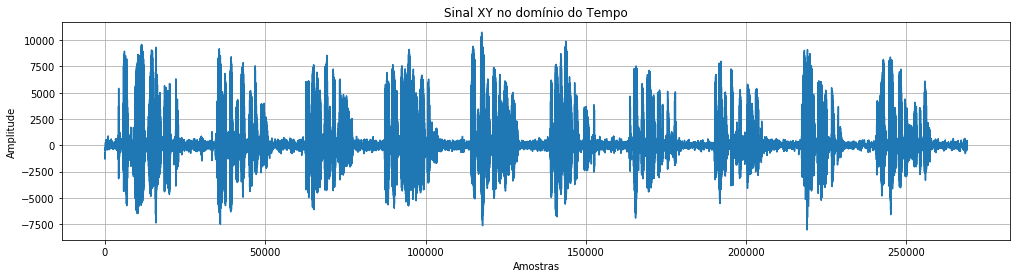

In [116]:
plt.figure(figsize=(17, 4))
plt.plot(signal)
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Sinal XY no domínio do Tempo')
plt.grid(True)
plt.show()

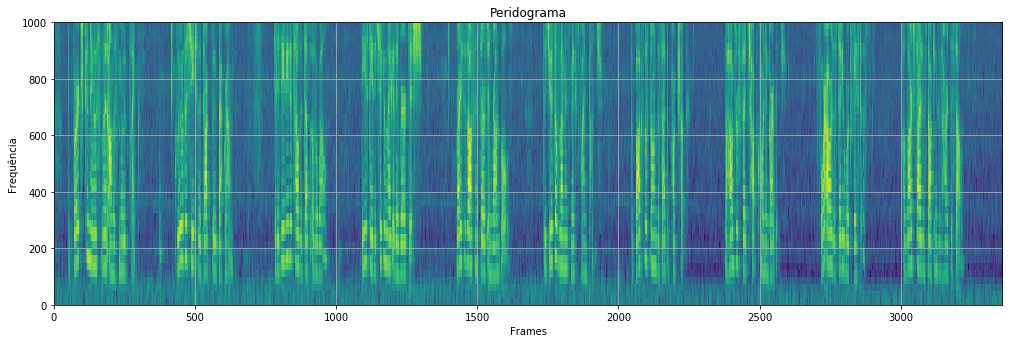

In [117]:
melgram = np.load('desafio/OSR_us_000_0010_8k.wav.npy')

plt.figure(figsize=(17, 6))
plt.imshow(melgram.transpose(), extent=[0,3360,0,40*25], origin='lower')
plt.xlabel('Frames')
plt.ylabel('Frequência')
plt.title('Peridograma')
plt.grid(True)
plt.show()

Reflexo de termos várias fases na mesma gravação.

In [56]:
import IPython.display as ipd # ouvir o audio produzido a partir do notebook

ipd.Audio(signal, rate=sample_rate) # Carrega o áudio da gravação do openspeach

# Referências

O material desta parte fora baseado em diversos tutoriais, dentre eles:
* http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/
* http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html